In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('dataset_full.csv')

In [5]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [6]:
df.shape

(88647, 112)

In [51]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [53]:
print(df.columns.tolist())

['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_spac

In [54]:
df['phishing'].value_counts()

phishing
0    58000
1    30647
Name: count, dtype: int64

In [55]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [56]:
df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109737,0.127851,0.246201,0.409549,0.498531,0.169224,0.550918,0.004187,-0.000405,...,-0.054120,-0.014089,-0.049845,0.012300,-0.065105,-0.051842,-0.004035,-0.002490,-0.059222,0.171128
qty_hyphen_url,0.109737,1.000000,0.213589,0.304762,0.061247,0.175158,0.041982,0.127984,0.018253,0.018090,...,0.029222,0.032991,-0.027048,-0.031027,0.009113,-0.001930,-0.002939,0.006875,-0.010346,0.200382
qty_underline_url,0.127851,0.213589,1.000000,0.246653,0.067009,0.334635,0.056885,0.256192,0.062300,-0.000767,...,0.004625,0.023962,-0.007595,-0.027089,0.012809,-0.013864,-0.001823,0.003421,-0.012158,0.191151
qty_slash_url,0.246201,0.304762,0.246653,1.000000,0.182759,0.287043,0.102281,0.202511,0.025946,0.015055,...,-0.046034,-0.032416,-0.045904,-0.021936,-0.018282,-0.047873,-0.005406,0.009470,-0.001125,0.699061
qty_questionmark_url,0.409549,0.061247,0.067009,0.182759,1.000000,0.461202,0.126747,0.467278,0.017859,0.004359,...,-0.025966,-0.003923,-0.032176,-0.006653,-0.040856,-0.024214,0.011679,0.010029,0.012847,0.111694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.051842,-0.001930,-0.013864,-0.047873,-0.024214,-0.043475,-0.017895,-0.030949,0.004488,-0.006923,...,0.274887,0.051420,0.133489,0.007329,0.306561,1.000000,0.038041,0.033091,0.049475,-0.061775
url_google_index,-0.004035,-0.002939,-0.001823,-0.005406,0.011679,-0.000349,-0.001903,-0.000335,-0.000811,-0.000336,...,0.043826,0.042233,0.022227,0.007591,0.026047,0.038041,1.000000,0.628815,-0.001785,-0.008986
domain_google_index,-0.002490,0.006875,0.003421,0.009470,0.010029,0.004701,-0.001889,0.001886,-0.001076,-0.000446,...,0.039959,0.040542,0.023628,0.008920,0.027592,0.033091,0.628815,1.000000,0.000045,0.000794
url_shortened,-0.059222,-0.010346,-0.012158,-0.001125,0.012847,-0.011855,-0.005330,-0.009989,-0.002503,-0.001038,...,0.059500,0.084482,0.013533,-0.031268,0.037850,0.049475,-0.001785,0.000045,1.000000,0.099250


In [7]:
status = df.corr()['phishing']
status

qty_dot_url             0.171128
qty_hyphen_url          0.200382
qty_underline_url       0.191151
qty_slash_url           0.699061
qty_questionmark_url    0.111694
                          ...   
qty_redirects          -0.061775
url_google_index       -0.008986
domain_google_index     0.000794
url_shortened           0.099250
phishing                1.000000
Name: phishing, Length: 112, dtype: float64

In [8]:
status.shape

(112,)

In [9]:
def select_feature(dataf, thres):
    selected = []
    i = 0
    for score in dataf:
        if abs(score) > thres:
            selected.append(dataf.index[i])
        i += 1
    return selected

In [10]:
features_selected = select_feature(status, 0.2)
features_selected

['qty_hyphen_url',
 'qty_slash_url',
 'qty_equal_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length',
 'qty_dot_params',
 'qty_hyphen_params',
 'qty_underline_params',
 'qty_slash_params',
 'qt

In [61]:
len(features_selected)

63

In [11]:
selected_features = [i for i in features_selected if i != 'phishing']
selected_features

['qty_hyphen_url',
 'qty_slash_url',
 'qty_equal_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length',
 'qty_dot_params',
 'qty_hyphen_params',
 'qty_underline_params',
 'qty_slash_params',
 'qt

In [12]:
X_selected = df[selected_features]
X_selected

,qty_hyphen_url,qty_slash_url,qty_equal_url,qty_tld_url,length_url,qty_dot_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,...,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,params_length,tld_present_params,qty_params,time_domain_activation
0,0,1,0,1,25,2,1,0,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,3,3,3,223,2,3,0,0,3,...,0,0,0,0,0,0,165,0,3,579
2,0,1,0,1,15,2,0,0,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,5,0,1,81,2,2,0,2,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,0,0,1,19,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,6998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,1,0,0,2,23,3,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5509
88643,0,0,0,1,34,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5046
88644,1,5,0,1,70,1,1,1,0,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1844
88645,0,1,0,1,28,2,0,0,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [13]:
y = df['phishing']
y

0        1
1        1
2        0
3        1
4        0
        ..
88642    0
88643    0
88644    1
88645    1
88646    0
Name: phishing, Length: 88647, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RFC = RandomForestClassifier(n_estimators=350, random_state=42)

In [69]:
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.metrics import specificity_score, sensitivity_score

def cal_metrics(model, X_test, y_test):
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    print('model accuracy: {0:4f}'.format(accuracy))
    
    sensitivity = sensitivity_score(y_test, pred, average='binary')
    print('model sensitivity: {0:4f}'.format(sensitivity))
    
    specificity = specificity_score(y_test, pred, average='binary')
    print('model specificity: {0:4f}'.format(specificity))
    
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print('roc_auc_score: {0:4f}'.format(auc_score))
    
    oconfusion_matrix = confusion_matrix(y_test, pred)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    print('classification report: \n {}'.format(classification_report(y_test, pred)))
    
    fp, tp, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
    random_probs = [0 for i in range(len(y_test))]
    f, t, _ = roc_curve(y_test, random_probs, pos_label=1)
    
    plt.plot(fp, tp, linestyle = '-', color = 'green', label = model)
    plt.plot(f, t, linestyle = '-', color = 'blue', label = 'Random Classifier')
    
    plt.title('ROC Curve')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend()
    
    plt.show()

model accuracy: 0.951795
model sensitivity: 0.932539
model specificity: 0.961889
roc_auc_score: 0.987211
Confusion matrix: 
 [[16784   665]
 [  617  8529]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     17449
           1       0.93      0.93      0.93      9146

    accuracy                           0.95     26595
   macro avg       0.95      0.95      0.95     26595
weighted avg       0.95      0.95      0.95     26595



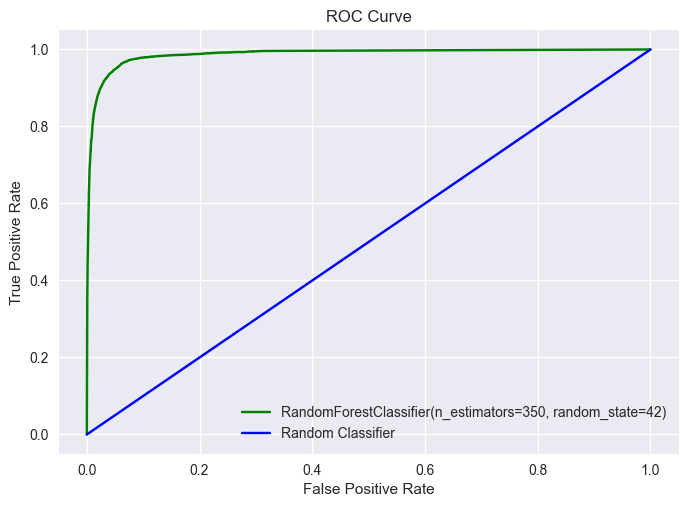

In [71]:
cal_metrics(RFC, X_test, y_test)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
LR = LogisticRegression()

In [74]:
LR.fit(X_train, y_train)

C:\Users\Abhilash Ku Behera\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model accuracy: 0.916450
model sensitivity: 0.913842
model specificity: 0.917818
roc_auc_score: 0.970187
Confusion matrix: 
 [[16015  1434]
 [  788  8358]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     17449
           1       0.85      0.91      0.88      9146

    accuracy                           0.92     26595
   macro avg       0.90      0.92      0.91     26595
weighted avg       0.92      0.92      0.92     26595



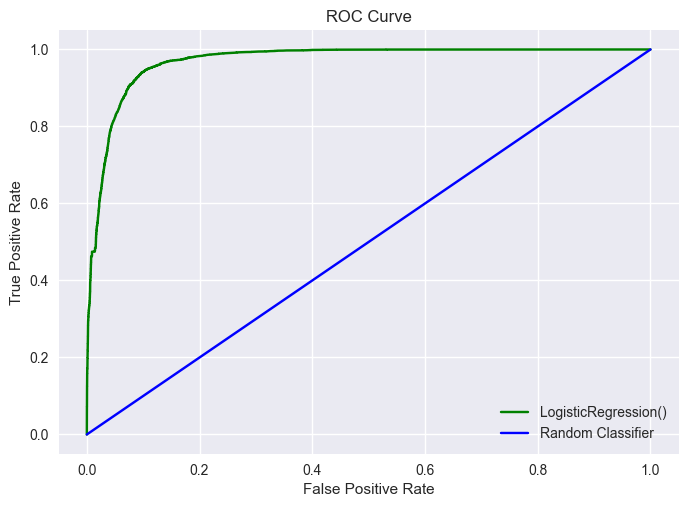

In [75]:
cal_metrics(LR, X_test, y_test)

In [76]:
from sklearn import tree

In [77]:
DT = tree.DecisionTreeClassifier()

In [78]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

model accuracy: 0.940252
model sensitivity: 0.903455
model specificity: 0.959539
roc_auc_score: 0.944197
Confusion matrix: 
 [[16743   706]
 [  883  8263]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     17449
           1       0.92      0.90      0.91      9146

    accuracy                           0.94     26595
   macro avg       0.94      0.93      0.93     26595
weighted avg       0.94      0.94      0.94     26595



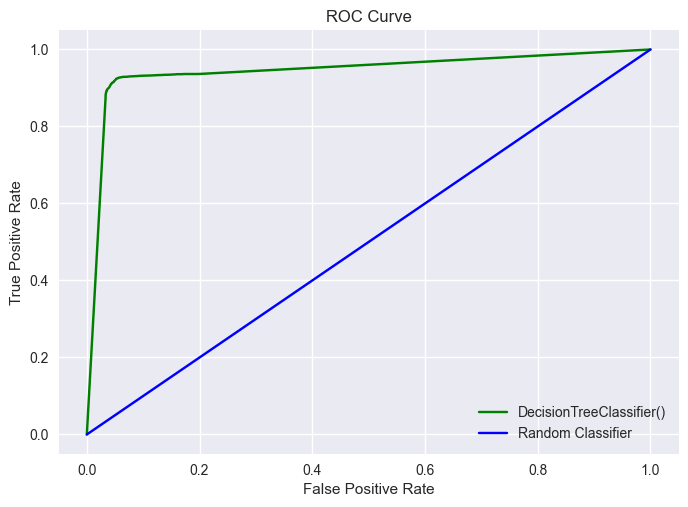

In [79]:
cal_metrics(DT, X_test, y_test)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
KNN = KNeighborsClassifier(n_neighbors=283)

In [82]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=283)

model accuracy: 0.876067
model sensitivity: 0.781216
model specificity: 0.925784
roc_auc_score: 0.945013
Confusion matrix: 
 [[16154  1295]
 [ 2001  7145]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     17449
           1       0.85      0.78      0.81      9146

    accuracy                           0.88     26595
   macro avg       0.87      0.85      0.86     26595
weighted avg       0.87      0.88      0.87     26595



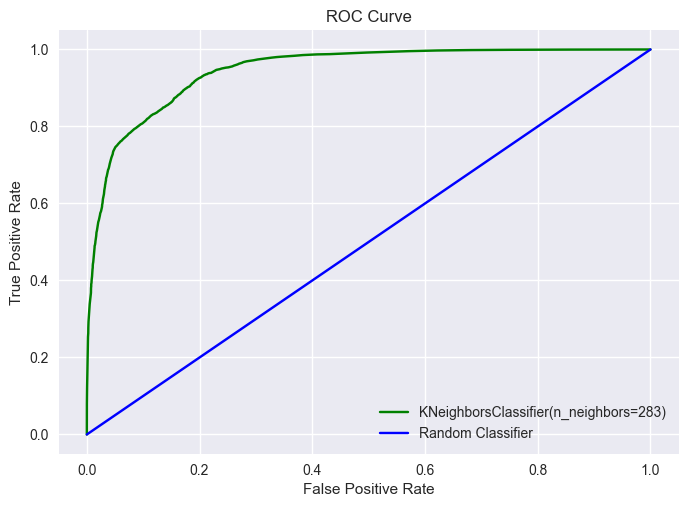

In [83]:
cal_metrics(KNN, X_test, y_test)

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
GNB = GaussianNB()

In [86]:
GNB.fit(X_train, y_train)

GaussianNB()

model accuracy: 0.867231
model sensitivity: 0.975618
model specificity: 0.810419
roc_auc_score: 0.946641
Confusion matrix: 
 [[14141  3308]
 [  223  8923]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     17449
           1       0.73      0.98      0.83      9146

    accuracy                           0.87     26595
   macro avg       0.86      0.89      0.86     26595
weighted avg       0.90      0.87      0.87     26595



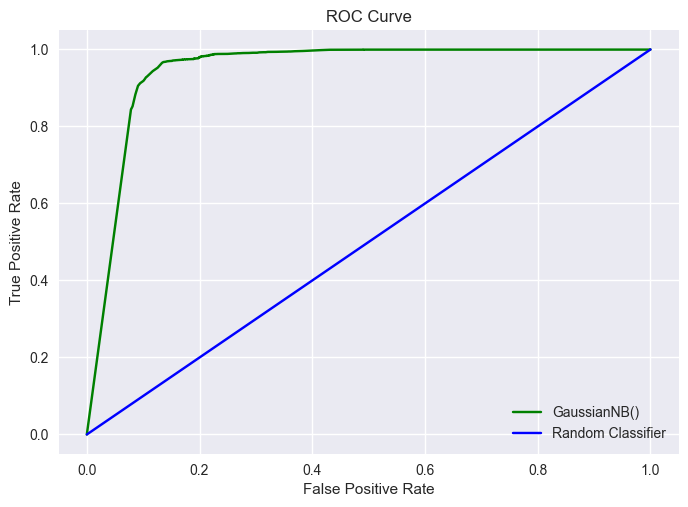

In [87]:
cal_metrics(GNB, X_test, y_test)

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [29]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [30]:
svm_linear = SVC(kernel='linear', random_state=42, cache_size=100)

In [31]:
svm_linear.fit(X_train_std, y_train)

SVC(cache_size=100, kernel='linear', random_state=42)

In [22]:
def cal_metrics_svm(model, X_test, y_test):
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    print('model accuracy: {0:4f}'.format(accuracy))
    
    sensitivity = sensitivity_score(y_test, pred, average='binary')
    print('model sensitivity: {0:4f}'.format(sensitivity))
    
    specificity = specificity_score(y_test, pred, average='binary')
    print('model specificity: {0:4f}'.format(specificity))
    
    oconfusion_matrix = confusion_matrix(y_test, pred)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    print('classification report: \n {}'.format(classification_report(y_test, pred)))

In [32]:
cal_metrics_svm(svm_linear, X_test_std, y_test)

model accuracy: 0.919947
model sensitivity: 0.923573
model specificity: 0.918047
Confusion matrix: 
 [[16019  1430]
 [  699  8447]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     17449
           1       0.86      0.92      0.89      9146

    accuracy                           0.92     26595
   macro avg       0.91      0.92      0.91     26595
weighted avg       0.92      0.92      0.92     26595



In [26]:
svm_poly = SVC(kernel='poly', random_state=42, cache_size=100)

In [27]:
svm_poly.fit(X_train_std, y_train)

SVC(cache_size=100, kernel='poly', random_state=42)

In [28]:
cal_metrics_svm(svm_poly, X_test_std, y_test)

model accuracy: 0.926076
model sensitivity: 0.895583
model specificity: 0.942060
Confusion matrix: 
 [[16438  1011]
 [  955  8191]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     17449
           1       0.89      0.90      0.89      9146

    accuracy                           0.93     26595
   macro avg       0.92      0.92      0.92     26595
weighted avg       0.93      0.93      0.93     26595



In [33]:
svm_rbf = SVC(kernel='rbf', random_state=42, cache_size=100)

In [34]:
svm_rbf.fit(X_train_std, y_train)

SVC(cache_size=100, random_state=42)

In [35]:
cal_metrics_svm(svm_rbf, X_test_std, y_test)

model accuracy: 0.926001
model sensitivity: 0.897442
model specificity: 0.940971
Confusion matrix: 
 [[16419  1030]
 [  938  8208]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     17449
           1       0.89      0.90      0.89      9146

    accuracy                           0.93     26595
   macro avg       0.92      0.92      0.92     26595
weighted avg       0.93      0.93      0.93     26595

